# Your task is to predict a happy or not happy face from  the test folder.

In [1]:
#STEP 1: IMPORT DEPENDENCIES
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sample = cv2.imread("/content/drive/MyDrive/data's sem 3/dataset/train/happy/1.png",1)

In [4]:
sample.shape

(405, 391, 3)

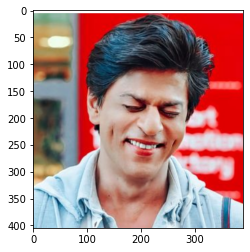

In [6]:
Datadirectory = "/content/drive/MyDrive/data's sem 3/dataset/train" ##TRAINING DATASET
Classes = [ "happy","not_happy"] ##List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread (os.path.join(path,img))
        #backtogb= cv2.cvtColor(img_array,cv3.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

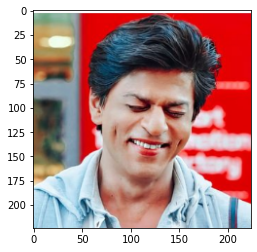

In [7]:
img_size = 224
new_array= cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
training_Data=[] ##data

def create_training_Data():
    for category in Classes:
        path= os.path.join(Datadirectory,category)
        class_num=Classes.index(category) #0, 1 Label
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

19


In [11]:
#shuffle images for better training 
import random
random.shuffle(training_Data)

In [12]:
X = [] #DATA 
y = [] #LABEL

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape #RGB CHANNEL

(19, 224, 224, 3)

In [14]:
#NORMALIZE THE DATA 

X=X/255.0;

In [17]:
y[1]

0

In [18]:
Y=np.array(y)

In [19]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)

pickle_out.close()

In [20]:
pickle_in= open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [21]:
#trasfer learning 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.mobilenet.MobileNet() #MobileNET is lightweight and pretrained Model

17235968/17225924 [==============================] - 1s 0us/step


In [23]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [24]:
base_input = model.layers[0].input

In [25]:
base_output = model.layers[-4].output

In [26]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #0 ,1 
final_output = layers.Activation('sigmoid')(final_output)

In [27]:
new_model = keras.Model(inputs= base_input, outputs= final_output )

In [28]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [29]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
new_model.fit(X,Y,epochs= 1, validation_split= 0.1)

1/1 [==============================] - 8s 8s/step - loss: 0.8168 - accuracy: 0.6471 - val_loss: 3.4429 - val_accuracy: 0.5000


In [31]:
new_model.save('my_model3.h5')

In [32]:
new_model = tf.keras.models.load_model('my_model3.h5') 

In [33]:
frame = cv2.imread("/content/drive/MyDrive/data's sem 3/dataset/test/1.png")

In [34]:
frame.shape

(667, 517, 3)

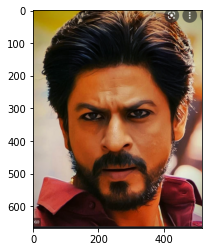

In [35]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [36]:
final_image= cv2.resize(frame , (224,224))
final_image= np.expand_dims(final_image,axis=0) ## Need a fourth dimension
final_image=final_image/255.0 #normalizing

In [37]:
Predictions = new_model.predict(final_image)

In [38]:
Predictions

array([[0.0002225]], dtype=float32)

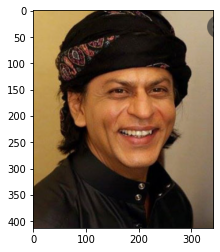

In [56]:
frame1 = cv2.imread("/content/drive/MyDrive/data's sem 3/dataset/test/2.png")
frame1.shape

plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))

In [57]:
final_image= cv2.resize(frame1 , (224,224))
final_image= np.expand_dims(final_image,axis=0) ## Need a fourth dimension
final_image=final_image/255.0 #normalizing
Predictions = new_model.predict(final_image)
Predictions

array([[0.00109991]], dtype=float32)

In [40]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime

In [41]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True   
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/data's sem 3/dataset/train",
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

validation_set = valid_datagen.flow_from_directory(
        "/content/drive/MyDrive/data's sem 3/dataset/val",
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        "/content/drive/MyDrive/data's sem 3/dataset/test",
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=validation_set,
        

        )

Found 19 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
2/2 [==============================] - 1s 448ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 2.5202 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 812ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 3.3374 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 1s 293ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 3.0665 - val_accuracy: 0.3333
Epoch 4/10
2/2 [==============================] - 1s 308ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 3.2336 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 1s 289ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 2.6738 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 1s 835ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 2.2790 - val_accuracy: 0.3333
Epoch 7/10
2/2 [==============================] - 1s 287ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 3.0036 - val_accuracy: 0.3333
Epoch 8/10
2/2 [====

In [43]:
model.save('mymodel.h5',model_saved)
mymodel=load_model('mymodel.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [44]:
from google.colab import files

In [46]:
files.download("mymodel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
files.download('my_model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>